Elegiremos un corpus nuevo: textos literarios de Project Gutenberg.

In [2]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.8/736.8 kB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 9.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.0
    Uninstalling ml_dtypes-0.5.0:
      Successfully uninstalled ml_dtypes-0.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py

Carga de Dataset y Preprocesamiento

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
import string

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='train', categories=['rec.autos', 'sci.space', 'talk.politics.mideast'])
print(f"Total de documentos: {len(newsgroups.data)}")

# Preprocesamiento de texto
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenización y minúsculas
    tokens = [w for w in tokens if w.isalnum()]  # Eliminar puntuación
    tokens = [w for w in tokens if w not in stop_words]  # Eliminar stopwords
    return tokens

# Tokenizar todo el corpus
tokenized_sentences = [preprocess(doc) for doc in newsgroups.data]
print("Ejemplo de tokens:", tokenized_sentences[0][:20])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emilianomartino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilianomartino/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Total de documentos: 1751
Ejemplo de tokens: ['nsmca', 'subject', 'russian', 'email', 'contacts', 'lines', '15', 'organization', 'university', 'alaska', 'fairbanks', 'anyone', 'russian', 'contacts', 'space', 'contacts', 'old', 'eastern', 'europe', 'post']


Entrenamiento del Modelo Word2Vec

In [10]:
# Entrenar Word2Vec con el dataset tokenizado
w2v_model = Word2Vec(sentences=tokenized_sentences,
                     vector_size=100,  # Dimensionalidad de los vectores
                     window=5,         # Contexto de palabras
                     min_count=5,      # Palabras con frecuencia mínima de 5
                     sg=1,             # Skip-Gram (1), CBOW (0)
                     epochs=10)

# Verificar las palabras en el vocabulario
print("Palabras en el vocabulario:", list(w2v_model.wv.index_to_key)[:20])


Palabras en el vocabulario: ['subject', 'would', 'lines', 'organization', 'one', 'writes', 'article', 'people', 'space', 'like', 'car', 'university', 'israel', 'know', 'could', 'get', 'us', 'said', 'also', 'time']


Busqueda de palabras relacionadas con autos, espacio y política.

In [11]:
# Términos de interés
terms_of_interest = ['car', 'engine', 'space', 'nasa', 'government', 'war']

# Calcular similitudes
print("\nSimilitud de palabras:")
for term in terms_of_interest:
    if term in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(term, topn=5)
        print(f"\nPalabra: '{term}' - Palabras más similares:")
        for word, score in similar_words:
            print(f"  - {word}: {score:.4f}")
    else:
        print(f"'{term}' no está en el vocabulario.")



Similitud de palabras:

Palabra: 'car' - Palabras más similares:
  - porsche: 0.5879
  - accord: 0.5783
  - ford: 0.5663
  - mazda: 0.5621
  - buying: 0.5610

Palabra: 'engine' - Palabras más similares:
  - ins: 0.7643
  - compartment: 0.7551
  - cam: 0.7548
  - v6: 0.7507
  - tranny: 0.7430

Palabra: 'space' - Palabras más similares:
  - digest: 0.5633
  - nasp: 0.5570
  - station: 0.5531
  - wales: 0.5511
  - publishes: 0.5506

Palabra: 'nasa' - Palabras más similares:
  - select: 0.6874
  - ames: 0.6721
  - goldin: 0.6702
  - dryden: 0.6497
  - jsc: 0.6401

Palabra: 'government' - Palabras más similares:
  - endorsed: 0.6234
  - likud: 0.6103
  - leasing: 0.6098
  - visa: 0.5970
  - arrogant: 0.5784

Palabra: 'war' - Palabras más similares:
  - gulf: 0.7034
  - undeclared: 0.6886
  - ensuing: 0.6598
  - enemy: 0.6471
  - torch: 0.6447


Proyeccion de los embeddings en 2D usando t-SNE.

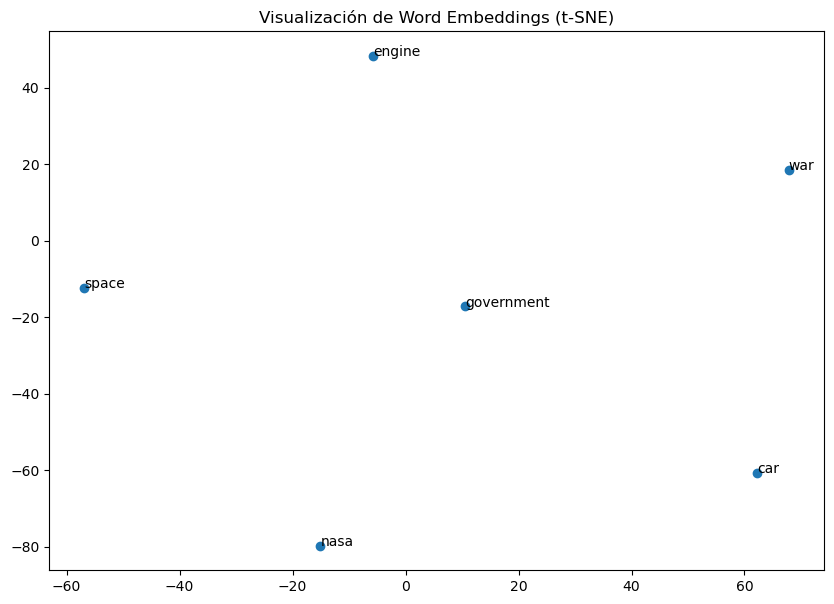

In [12]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir dimensionalidad con t-SNE
words = ['car', 'engine', 'nasa', 'space', 'government', 'war']
embeddings = np.array([w2v_model.wv[word] for word in words if word in w2v_model.wv])

tsne = TSNE(n_components=2, perplexity=5, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Graficar en 2D
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("Visualización de Word Embeddings (t-SNE)")
plt.show()
